# Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scripts.aqi_state_agg import get_cdc_data, agg_county_weighted_mean

In [ ]:
# read CDI data as DataFrame
cdi = pd.read_csv('data/cdi.csv')

## Scatterplot of PM 2.5 concentration and COPD prevalence

In [ ]:
copd_prev_2014 = cdi[
    (cdi['Topic'] == 'Chronic Obstructive Pulmonary Disease')
    & (cdi['YearStart'] == 2014)
    & (cdi['QuestionID'] == 'COPD2_0')
    & (cdi['DataValueTypeID'] == 'AGEADJPREV')
    & (cdi['StratificationCategory1'] == 'Overall')
].loc[:, ['LocationAbbr', 'DataValue']]

copd_prev_2014['DataValue'] = copd_prev_2014['DataValue'].astype(float)

pm25_2014 = get_cdc_data("01JUL2014", ozone=False)
pm25_by_state_2014 = agg_county_weighted_mean(pm25_2014)

copd_pm25 = copd_prev_2014.merge(pm25_by_state_2014, right_on="abbrev", left_on="LocationAbbr", how='inner')
copd_pm25.head()

  0%|          | 0/1 [00:00<?, ?it/s]

,LocationAbbr,DataValue,01JUL2014,state,abbrev
0,AL,9.7,22.966910,Alabama,AL
1,AR,8.2,23.433149,Arkansas,AR
2,AZ,6.6,4.887055,Arizona,AZ
3,CA,4.7,12.510747,California,CA
4,CO,3.9,11.874387,Colorado,CO


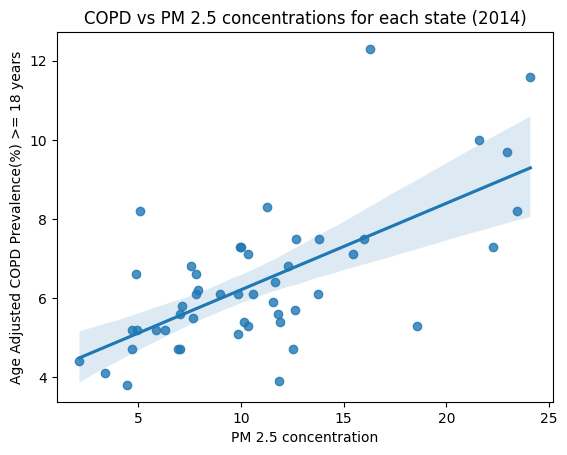

In [ ]:
sns.regplot(data=copd_pm25,  x="01JUL2014", y="DataValue")
plt.xlabel("PM 2.5 concentration")
plt.ylabel("Age Adjusted COPD Prevalence(%) >= 18 years")
plt.title("COPD vs PM 2.5 concentrations for each state (2014)")
plt.savefig("figures/EDA1.png")

## Heatmaps of PM 2.5 concentrations at various times in the year

In [ ]:
jan2014 = get_cdc_data("01JAN2014", ozone=False)
jan2014 = agg_county_weighted_mean(jan2014)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
fig = px.choropleth(
    title=r"January 2014, PM 2.5 concentration",
    locations=jan2014['abbrev'],
    locationmode="USA-states",
    color=jan2014['01JAN2014'],
    scope="usa",
)
fig.layout.coloraxis.colorbar.title = "μg/m^3"
fig.show()

In [ ]:
jul2014 = get_cdc_data("01JUL2014", ozone=False)
jul2014 = agg_county_weighted_mean(jul2014)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
fig = px.choropleth(
    title=r"July 2014, PM 2.5 concentration",
    locations=jan2014['abbrev'],
    locationmode="USA-states",
    color=jul2014['01JUL2014'],
    scope="usa",
)
fig.layout.coloraxis.colorbar.title = "μg/m^3"
fig.show()

## Scatterplot of Obesity Prevalence and Diabetes Prevalence

In [ ]:
obesity = cdi[
    (cdi["Question"]=="Obesity among adults aged >= 18 years")
    & (cdi["DataValueType"] == "Age-adjusted Prevalence")
    & (cdi["StratificationCategory1"] == 'Overall')
].loc[:, ['YearStart', 'LocationAbbr', 'DataValueAlt']]

diabetes = cdi[
    (cdi["Question"]== "Prevalence of diagnosed diabetes among adults aged >= 18 years")
    & (cdi["DataValueType"]== "Age-adjusted Prevalence")
    & (cdi["StratificationCategory1"] == 'Overall')
].loc[:, ['YearStart', 'LocationAbbr', 'DataValueAlt']]

obesity_vs_diabetes = diabetes.merge(obesity, on=["YearStart", "LocationAbbr"], how="inner")
obesity_vs_diabetes.head()

,YearStart,LocationAbbr,DataValueAlt_x,DataValueAlt_y
0,2011,NV,10.0,24.3
1,2016,OH,9.7,31.4
2,2016,NE,8.1,32.1
3,2015,OR,9.6,30.1
4,2020,AL,13.1,39.3


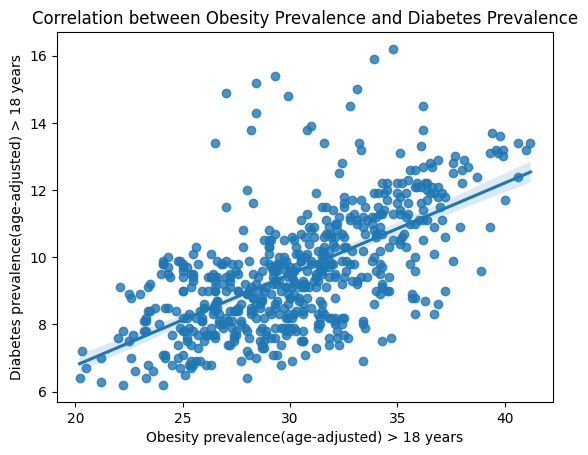

In [ ]:
sns.regplot(data=obesity_vs_diabetes, y="DataValueAlt_x", x="DataValueAlt_y")
plt.xlabel("Obesity prevalence(age-adjusted) > 18 years")
plt.ylabel("Diabetes prevalence(age-adjusted) > 18 years")
plt.title("Correlation between Obesity Prevalence and Diabetes Prevalence")
plt.savefig("figures/EDA3.png")

## Percentage of Diagnosed Diabetes per Age Group (across 50 US States)

In [ ]:
# drop unecessary columns
diabetes_age = categorical_diabetes.drop(columns=["male", "female", "State"])

# no data rows + drop guam, puerto rico - only 50 states
diabetes_age = diabetes_age.drop(index=[51, 52, 53, 54])

# convert to float
diabetes_age = diabetes_age.astype(float)
diabetes_age.head()

,18-44,45-64,65-74,75+
0,4.8,17.8,24.3,21.0
1,1.8,10.3,21.3,21.0
2,2.8,14.0,21.8,18.7
3,3.9,17.9,24.7,22.8
4,2.9,15.4,21.5,22.5


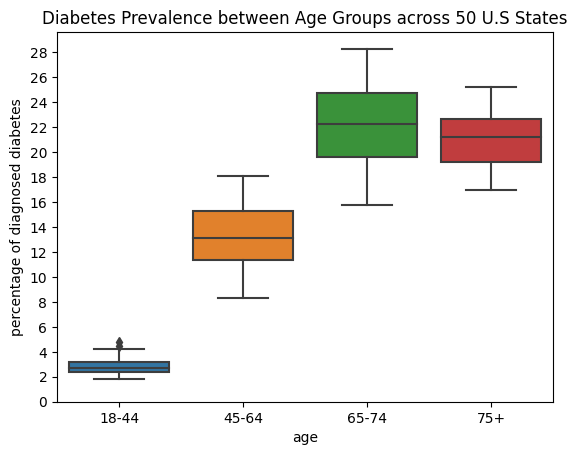

In [ ]:
#plot Diabetes Prevalence per Age Group across 50 U.S States
sns.boxplot(x="variable", y="value", data=pd.melt(diabetes_age));
plt.title("Diabetes Prevalence between Age Groups across 50 U.S States");
plt.xlabel("age");
plt.ylabel("percentage of diagnosed diabetes");

plt.yticks(np.arange(0, 30, step=2))

plt.savefig("figures/EDA4.png");

## Diabetes Prevalence between Sex

In [ ]:
diabetes_sex = categorical_diabetes[["male", "female"]]
diabetes_sex = diabetes_sex.iloc[:-2]
diabetes_sex = diabetes_sex.astype(float)
diabetes_sex.head()

,male,female
0,12.0,11.5
1,6.7,8.6
2,10.1,8.3
3,11.9,11.3
4,10.9,9.0


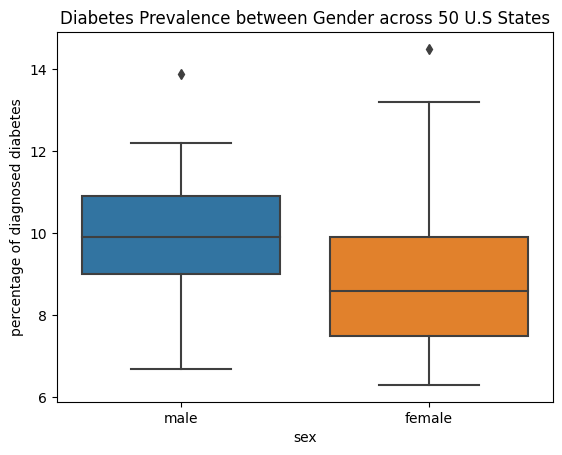

In [ ]:
#plot Diabetes Prevalence per Age Group across 50 U.S States
sns.boxplot(x="variable", y="value", data=pd.melt(diabetes_sex));
plt.title("Diabetes Prevalence between Gender across 50 U.S States");
plt.xlabel("sex")
plt.ylabel("percentage of diagnosed diabetes")

plt.savefig("figures/EDA5.png");